# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Bagas Winerang]
- **Email:** [m002b4ky0788@bangkit.academy]
- **ID Dicoding:** [M002B4KY0788]

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran antara penjual dengan pembeli?
- Produk apa yang paling banyak dan sedikit terjual?
- Apakah penjual menerima pesanan dengan cepat, kemudian mengirimkan tepat waktu?
- Manakah produk yang berkontribusi pemasukan paling besar dan yang paling kecil?
- Metode pembayaran apa yang digunakan pelanggan untuk melakukan transaksi?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sqla

## Data Wrangling

### Gathering Data

Membaca Tipe Data Menggunakan Pandas (Format berkas CSV)

In [9]:
customers_dataset = pd.read_csv('data/customers_dataset.csv')
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
geolocation_dataset = pd.read_csv('data/geolocation_dataset.csv')
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
order_items_dataset = pd.read_csv('data/order_items_dataset.csv')
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
order_payments_dataset = pd.read_csv('data/order_payments_dataset.csv')
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
order_reviews_dataset = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_dataset.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [14]:
orders_dataset = pd.read_csv('data/orders_dataset.csv')
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [16]:
products_dataset = pd.read_csv('data/products_dataset.csv')
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
sellers_dataset = pd.read_csv('data/sellers_dataset.csv')
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Pada Kali ini kita kan assesing data, yaitu:
1. Apakah terdapat missing value pada masing-masing data.
2. Apakah terdapat duplicate value pada masing-masing data.

Menilai tabel customers_dataset.csv

In [21]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [22]:
customers_dataset.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [23]:
customers_dataset.duplicated().sum()

0

In [24]:
customers_dataset.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Menilai tabel geolocation_dataset

In [26]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [27]:
geolocation_dataset.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [28]:
geolocation_dataset.duplicated().sum()

261831

**Terdapat duplikasi data pada file geolocation_dataset**

In [30]:
geolocation_dataset.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Menilai data order_items_dataset

In [32]:
 order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [33]:
 order_items_dataset.duplicated().sum()

0

In [34]:
 order_items_dataset.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Menilai data order_payments_dataset

In [36]:
order_payments_dataset.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [37]:
order_payments_dataset.duplicated().sum()

0

In [38]:
order_payments_dataset.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Menilai data order_reviews_dataset

In [40]:
order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

terdapat missing value

In [42]:
order_reviews_dataset.duplicated().sum()

0

In [43]:
order_reviews_dataset.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [44]:
order_reviews_dataset.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


Menilai data orders_dataset

In [46]:
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat missing value

In [48]:
orders_dataset.duplicated().sum()

0

In [49]:
orders_dataset.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai data product_category_name_translation

In [51]:
product_category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [52]:
product_category_name_translation.duplicated().sum()

0

In [53]:
product_category_name_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Menilai data products_dataset

In [55]:
products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [56]:
products_dataset.duplicated().sum()

0

In [57]:
products_dataset.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Menilai data sellers_dataset

In [59]:
sellers_dataset.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [60]:
sellers_dataset.duplicated().sum()

0

In [61]:
sellers_dataset.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- Terdapat missing value pada data:

1.   order_reviews_dataset
2.   orders_dataset
3.   products_dataset


- Terdapat duplicate value pada data:

1.   geolocation_dataset

### Cleaning Data

Dari insight yang telah kita terima dari proses Assesing Data. kita dapat melakukan pembersihan maupun perbaikan pada data-data kita.

**Duplicate data**

Data geolocation_dataset

In [67]:
geolocation_dataset.duplicated().sum()

261831

In [68]:
geolocation_dataset.drop_duplicates(inplace=True)

In [69]:
print("Jumlah duplikasi: ", geolocation_dataset.duplicated().sum())

Jumlah duplikasi:  0


**Missing value**

Data order_reviews_dataset

isnull ngecek ada missing value atau ngga ??

NaN atau None, contoh missing value

In [73]:
order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [74]:
order_reviews_dataset['review_comment_title'].fillna(value='Bom', inplace=True)

C:\Users\Bagas Winerang\AppData\Local\Temp\ipykernel_26540\3106839569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_dataset['review_comment_title'].fillna(value='Bom', inplace=True)


In [75]:
order_reviews_dataset['review_comment_message'].fillna(value='Altamente recomendado', inplace=True)

C:\Users\Bagas Winerang\AppData\Local\Temp\ipykernel_26540\3936360039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_dataset['review_comment_message'].fillna(value='Altamente recomendado', inplace=True)


In [76]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Bom,Altamente recomendado,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Bom,Altamente recomendado,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Bom,Altamente recomendado,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Bom,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Bom,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [77]:
order_reviews_dataset.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Data orders_dataset

In [79]:
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [80]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [81]:
orders_dataset[orders_dataset['order_approved_at'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00


In [82]:
orders_dataset['order_delivered_carrier_date'].interpolate(method='linear', limit_direction='forward', inplace=True)
orders_dataset['order_delivered_customer_date'].interpolate(method='linear', limit_direction='forward', inplace=True)
orders_dataset['order_approved_at'].interpolate(method='linear', limit_direction='forward', inplace=True)

C:\Users\Bagas Winerang\AppData\Local\Temp\ipykernel_26540\1358058256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_dataset['order_delivered_carrier_date'].interpolate(method='linear', limit_direction='forward', inplace=True)
C:\Users\Bagas Winerang\AppData\Local\Temp\ipykernel_26540\1358058256.py:1: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  orders_dataset['order_delivered_carrier_date'].i

In [83]:
orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [84]:
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Data products_dataset

In [86]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [87]:
products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [88]:
products_dataset[products_dataset['product_weight_g'].isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
products_dataset[products_dataset['product_photos_qty'].isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [90]:
values_1 = {'product_category_name': 'produk lain'}
values_2 = {'product_name_lenght' : products_dataset.product_name_lenght.mean(), 'product_description_lenght': products_dataset.product_description_lenght.mean(),
            'product_photos_qty': products_dataset.product_photos_qty.mean(), 'product_weight_g': products_dataset.product_weight_g.mean(),
            'product_length_cm': products_dataset.product_length_cm.mean(), 'product_height_cm': products_dataset.product_height_cm.mean(),
            'product_width_cm': products_dataset.product_width_cm.mean()
}

values = {**values_1, **values_2}

products_dataset.fillna(value=values, inplace=True)

In [91]:
products_dataset.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**

Telah diperbaiki missing value pada data:

1.   order_reviews_dataset
2.   orders_dataset
3.   products_dataset

Telah diperbaiki duplicate value pada data:

1.   geolocation_dataset

## Exploratory Data Analysis (EDA)

### Explore ...

Explore customers_dataset

In [96]:
customers_dataset.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2512,275db5beec4804dab556e6070a658374,368c20747bac9557de843995fc693e51,9971,diadema,SP
75276,d15d033d5e018800997e13b99c63de00,c844fe1be37e165a5fc633c9d7889799,22713,rio de janeiro,RJ
58985,3f0ce4e8579d852bd56ab8bbe66f1870,6ac4c2b8476a9b14dc824e2cda804dfc,27937,macae,RJ
16392,3fd171b35b40e2251a46796b89d4466e,ac234ce93625f413215b32d92af36d44,83430,campina grande do sul,PR
22050,5bc1bf7176469cce9690d4d9d42ae679,5f41b1957f063351f20bf9d83f59c3ae,5005,sao paulo,SP


In [97]:
df = customers_dataset.groupby(by="customer_city").agg({

    'customer_id': 'nunique',
    'customer_zip_code_prefix': 'first',
    'customer_city': 'first',
    'customer_state': 'first'
})

df.sort_values(by='customer_id', ascending=False)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_city,,,,
sao paulo,15540,1151,sao paulo,SP
rio de janeiro,6882,20231,rio de janeiro,RJ
belo horizonte,2773,30575,belo horizonte,MG
brasilia,2131,72270,brasilia,DF
curitiba,1521,81560,curitiba,PR
...,...,...,...,...
ibiara,1,58980,ibiara,PB
rio espera,1,36460,rio espera,MG
rio dos indios,1,99610,rio dos indios,RS


Explore geolocation_dataset

In [99]:
geolocation_dataset.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
871083,84940,-23.684030,-49.829107,siqueira campos,PR
946852,91150,-30.008329,-51.118894,porto alegre,RS
125557,5359,-23.570692,-46.745597,sao paulo,SP
262780,11730,-24.118343,-46.685947,mongaguá,SP
914517,88501,-27.817565,-50.327664,lages,SC


Explore order_items_dataset

In [101]:
order_items_dataset.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
31174,46b54803053a4980508c20a1927bd9ab,1,7a5d0e89d069c89b2112e9da539343c2,688756f717c462a206ad854c5027a64a,2018-07-31 15:25:09,118.99,22.13
41447,5e703e05bcb502963f75e2a2a2eb7b73,1,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-07-06 08:32:46,130.00,27.68
106353,f1b2f741c002e0bf5f0f63e3b83c1a21,2,656e0eca68dcecf6a31b8ececfabe3e8,5f67c6082caacb26e431a7b17940cece,2018-03-05 18:29:06,82.80,12.71
82230,badd6d6cf755e89c81ba57457f8aacc9,1,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2017-05-08 12:36:43,349.00,22.89
44235,6496c94097bf68ceb80535be2e73c766,1,7104eafd29c0b00fe99250034af0d978,e8b3a3a38279a82f0e5d006d5e5b7d2c,2017-11-14 12:10:35,249.90,15.48


In [102]:
order_items_df = order_items_dataset.groupby(by="product_id").agg({

    'price': 'first',
    'freight_value': 'first',
    'shipping_limit_date': 'first'
})

order_items_df.sort_values(by='price', ascending=False).head()

,price,freight_value,shipping_limit_date
product_id,,,
489ae2aa008f021502940f251d4cce7f,6735.0,194.31,2017-02-16 20:37:36
69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,193.21,2018-08-02 04:05:13
1bdf5e6731585cf01aa8169c7028d6ad,6499.0,227.66,2017-06-15 02:45:17
a6492cc69376c469ab6f61d8f44de961,4799.0,151.34,2017-04-18 13:25:18
c3ed642d592594bb648ff4a04cee2747,4690.0,74.34,2017-05-09 15:50:15


Explore order_payments_dataset

In [104]:
order_payments_dataset.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
22043,d072721a35666a6441234e765e92e205,1,credit_card,1,82.00
47856,bd96eed920dc1aa5f5ecefcae1ed673b,1,credit_card,3,166.29
46146,628fedcd693f3b7d66306884d2c043c6,1,credit_card,1,46.02
28109,4aba2130d53fd001fc18322c94b58105,1,credit_card,6,138.65
70986,ba1f99140d4a9799217d7a9d67b8c1f3,1,credit_card,3,52.33


In [105]:
payment_type_df = order_payments_dataset['payment_type'].value_counts()

print(payment_type_df)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


Explore order_reviews_dataset

In [107]:
order_reviews_dataset.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
67227,fee23cdb1d1fb712bb7fc09cf3d1b0fb,6c004aa51ca258da5f0936ce3a38ab18,4,Bom,Altamente recomendado,2017-12-19 00:00:00,2017-12-21 23:20:31
54011,613e46c726191d59533085b22940fcd5,f2125ad278ab03d4779ded7001337ee1,1,Bom,Pedi a devolução do dinheiro e mesmo assim env...,2017-12-20 00:00:00,2017-12-23 00:50:18
20861,72a0a9b9bf8628ceaa01e4054736fc84,9680f3fdc078a63f1a4d5fca0f7790d8,4,Bom,Altamente recomendado,2018-04-03 00:00:00,2018-04-09 19:17:54
78772,d3c52fff92fd0892fbf852a5da054d63,e131f6ad498a67f7d30e5cc9702a3d99,5,Bom,Altamente recomendado,2018-02-18 00:00:00,2018-02-20 14:17:01
71940,ac7ebe51f59d79b99898c9d541b3868d,907424cd045f2dcb775507e367f9ab60,1,Demora no recebimento,Estou a 3 dias em casa sem sair aguardando o p...,2018-08-16 00:00:00,2018-08-16 12:22:19


In [108]:
review_score_df = order_reviews_dataset['review_score'].value_counts()

print(review_score_df)

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


Explore orders_dataset

In [110]:
orders_dataset.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
56096,7643003db706885af24736e3a12e76bd,c715072863363b451f8de00e1b2eb9d4,delivered,2018-04-20 14:48:42,2018-04-24 19:09:38,2018-04-23 19:28:49,2018-05-03 20:09:48,2018-05-18 00:00:00
76487,c9aca7a39b1655e0d52070203567e664,85cea0ddc5af1b23c05bf395e22eca9e,delivered,2017-11-08 13:24:57,2017-11-09 04:31:09,2017-11-09 18:51:40,2017-11-10 16:21:47,2017-12-04 00:00:00
39463,427d1fd357bbc9330885c3e8f1c85325,d22cb0e586a9334ee707b5967c412a42,delivered,2017-06-20 08:52:39,2017-06-21 02:32:19,2017-06-23 12:27:53,2017-06-26 13:42:23,2017-07-05 00:00:00
12903,99beb0ca1e257ea579db2f8e68d0165c,b9d25a78c4295ec207824ac5dc4d327b,delivered,2017-03-14 11:32:40,2017-03-14 11:32:40,2017-03-14 15:31:03,2017-03-23 10:52:06,2017-04-06 00:00:00
14345,b2b34605d25df88c45e5330a376dc8b3,f1c9108faec06a72a4e597c922ef2622,delivered,2018-01-05 16:27:44,2018-01-05 16:35:34,2018-01-10 21:05:55,2018-01-11 22:58:33,2018-01-23 00:00:00


In [111]:
order_status_df = orders_dataset['order_status'].value_counts()

print(order_status_df)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [112]:
orders_dataset["order_approved_at"] = pd.to_datetime(orders_dataset["order_approved_at"], errors='coerce')
orders_dataset["order_purchase_timestamp"] = pd.to_datetime(orders_dataset["order_purchase_timestamp"], errors='coerce')

accepted_time = orders_dataset["order_approved_at"] - orders_dataset["order_purchase_timestamp"]
accepted_time = accepted_time.apply(lambda x: x.total_seconds())
orders_dataset["accepted_time"] = round(accepted_time / 86400)

In [113]:
orders_dataset["order_delivered_customer_date"] = pd.to_datetime(orders_dataset["order_delivered_customer_date"], errors='coerce')
orders_dataset["order_approved_at"] = pd.to_datetime(orders_dataset["order_approved_at"], errors='coerce')

delivery_time = orders_dataset["order_delivered_customer_date"] - orders_dataset["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_dataset["delivery_time"] = round(delivery_time / 86400)

In [114]:
orders_dataset["order_estimated_delivery_date"] = pd.to_datetime(orders_dataset["order_estimated_delivery_date"], errors='coerce')
orders_dataset["order_approved_at"] = pd.to_datetime(orders_dataset["order_approved_at"], errors='coerce')

delivery_time_estimated = orders_dataset["order_estimated_delivery_date"] - orders_dataset["order_approved_at"]
delivery_time_estimated = delivery_time_estimated.apply(lambda x: x.total_seconds())
orders_dataset["delivery_time_estimated"] = round(delivery_time_estimated / 86400)

In [115]:
orders_dataset.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,accepted_time,delivery_time,delivery_time_estimated
count,99441,99441,99441,99441,99281,97658,96476,99441,99281.000000,96462.000000,99281.000000
unique,99441,99441,8,NaN,NaN,81018,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,2018-05-09 15:48:00,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,47,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,NaN,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,0.427272,12.119892,23.280547
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,NaN,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000,-7.000000,-146.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,NaN,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,0.000000,6.000000,18.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,NaN,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,0.000000,10.000000,23.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,NaN,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,1.000000,15.000000,28.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,NaN,2018-10-17 13:22:46,2018-11-12 00:00:00,188.000000,209.000000,154.000000


In [116]:
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)
    
    # Buat kondisi untuk outlier
    kondisi_lower_than = column < minimum
    kondisi_more_than = column > maximum
    
    # Masking outlier
    column = column.mask(kondisi_more_than, maximum)
    column = column.mask(kondisi_lower_than, minimum)
    
    return column

orders_dataset['accepted_time'] = handle_outliers_iqr(orders_dataset['accepted_time'])
orders_dataset['delivery_time'] = handle_outliers_iqr(orders_dataset['delivery_time'])
orders_dataset['delivery_time_estimated'] = handle_outliers_iqr(orders_dataset['delivery_time_estimated'])

orders_dataset[['accepted_time', 'delivery_time', 'delivery_time_estimated']].describe()

,accepted_time,delivery_time,delivery_time_estimated
count,99281.000000,96462.000000,99281.000000
mean,0.380919,11.520599,23.096101
std,0.695324,7.086436,8.176973
min,0.000000,-7.000000,3.000000
25%,0.000000,6.000000,18.000000
50%,0.000000,10.000000,23.000000
75%,1.000000,15.000000,28.000000
max,2.500000,28.500000,43.000000


masih terdapat nilai negatif pada data, kemudian coba kita ubah negatif menjadi 0

In [118]:
orders_dataset['delivery_time'] = orders_dataset['delivery_time'].mask(orders_dataset['delivery_time'] < 0, 0)

orders_dataset['delivery_time'] = handle_outliers_iqr(orders_dataset['delivery_time'])

orders_dataset['delivery_time'].describe()

count    96462.000000
mean        11.521573
std          7.084602
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max         28.500000
Name: delivery_time, dtype: float64

Explore product_category_name_translation

In [120]:
product_category_name_translation.sample(5)

,product_category_name,product_category_name_english
3,cama_mesa_banho,bed_bath_table
17,fashion_bolsas_e_acessorios,fashion_bags_accessories
37,agro_industria_e_comercio,agro_industry_and_commerce
55,fashion_roupa_feminina,fashio_female_clothing
20,audio,audio


Explore products_dataset

In [122]:
products_dataset.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32517,3d5c815469b90f2f4b1bf62ddf6aed25,moveis_decoracao,18.0,385.0,4.0,577.0,17.0,25.0,23.0
9342,22b389f7d49493889ceda26c606ea0af,utilidades_domesticas,42.0,247.0,1.0,1250.0,16.0,16.0,25.0
19136,1ba4e3fe92f16fd5a8942f7b7d804b52,bebes,52.0,341.0,2.0,8500.0,45.0,25.0,45.0
32393,77b5ea25050e269eab5d164be2be1711,esporte_lazer,60.0,857.0,1.0,150.0,16.0,17.0,22.0
28297,f4621f8ad6f54a2e3c408884068be46d,esporte_lazer,27.0,485.0,2.0,600.0,35.0,15.0,28.0


In [123]:
products_dataset.product_photos_qty.sort_values(ascending=False).head()

9022     20.0
19056    19.0
28073    18.0
17843    18.0
24522    17.0
Name: product_photos_qty, dtype: float64

Explore sellers_dataset

In [125]:
sellers_dataset.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2199,cb810bd318f51b3dc3c753944d61a1fa,24240,niteroi,RJ
2712,c847e075301870dd144a116762eaff9a,38022,uberaba,MG
498,e4f121bf6ef8b9a1d4d3e65dd0473fab,15085,sao jose do rio preto,SP
2943,5a9b3bcab695173c820e53934574ae80,13320,salto,SP
240,a254c682cc01e119f83530446f1df9a9,16500,cafelandia,SP


In [126]:
seller_city_df = sellers_dataset.groupby(by="seller_city").agg({

    'seller_id': 'nunique',
    'seller_city': 'first',
    'seller_state': 'first'
})

seller_city_df.sort_values(by='seller_id', ascending=False).head()

,seller_id,seller_city,seller_state
seller_city,,,
sao paulo,694,sao paulo,SP
curitiba,127,curitiba,PR
rio de janeiro,96,rio de janeiro,RJ
belo horizonte,68,belo horizonte,MG
ribeirao preto,52,ribeirao preto,SP


**Insight:**
Semua data sudah kita explore, mari kita analisa lebih lanjut mengenai visualisasi data yang ingin kita tampilkan

## Visualization & Explanatory Analysis

Penyesuain data dengan cara merge

In [130]:
customers_dataset.sample(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
10929,dbeb6032cc304120dc34e825b99eaa2c,0a6ca1c9f4484e9d9f9529ffa79568d6,4055,sao paulo,SP


In [131]:
geolocation_dataset.sample(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
820227,78085,-15.637005,-56.061506,cuiaba,MT


In [132]:
order_items_dataset.sample(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7314,1093c8304c7a003280dd34598194913d,1,124f74f703e88efe001a10bfa718b6ff,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.9,16.11


In [133]:
order_payments_dataset.sample(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
10305,3087dfec43100fd80fab47b128aeaea9,1,credit_card,8,104.42


In [134]:
order_reviews_dataset.sample(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15924,09a2084bfd932fddd297630cc14b8d51,798b9fc552a89606eb4d38b1f8a4760e,5,Bom,Altamente recomendado,2017-06-27 00:00:00,2017-06-28 15:33:12


In [135]:
orders_dataset.sample(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,accepted_time,delivery_time,delivery_time_estimated
10153,40d3d467b60d085876c572510701fc47,8e7624ef906783b093a58207d95bf082,delivered,2018-04-05 16:17:21,2018-04-05 16:35:18,2018-04-07 00:04:12,2018-04-12 18:58:28,2018-05-03,0.0,7.0,27.0


In [136]:
product_category_name_translation.sample(1)

,product_category_name,product_category_name_english
63,portateis_casa_forno_e_cafe,small_appliances_home_oven_and_coffee


In [137]:
products_dataset.sample(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25047,6906f6d2bb318a3cbb5351653e93ceb4,beleza_saude,49.0,907.0,3.0,6150.0,58.0,60.0,16.0


In [138]:
sellers_dataset.sample(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
51,d71d863e5ef30d94e440c11be17dcd8f,6144,osasco,SP


### Pertanyaan 1: Bagaimana persebaran antara penjual dengan pembeli?

merge antara customers_dataset dengan geolocation_dataset, untuk mengetahui letak geolocation data customers

In [141]:
geo_customers_df = pd.merge(
    left=customers_dataset,
    right=geolocation_dataset,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
geo_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP


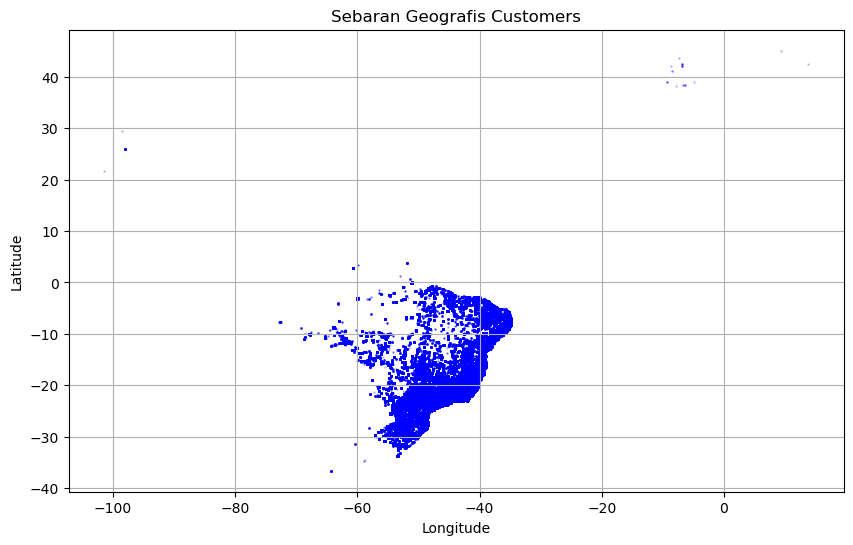

In [142]:
plt.figure(figsize=(10,6))
plt.scatter(geo_customers_df['geolocation_lng'], geo_customers_df['geolocation_lat'], s=0.5, alpha=0.25, color = 'blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sebaran Geografis Customers")
plt.grid(True)
plt.show()

merge antara seller_dataset dengan geolocation_dataset, untuk mengetahui letak geolocation data sellers

In [144]:
geo_sellers_df = pd.merge(
    left=sellers_dataset,
    right=geolocation_dataset,
    how="left",
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
geo_sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.896154,-47.062431,campinas,SP


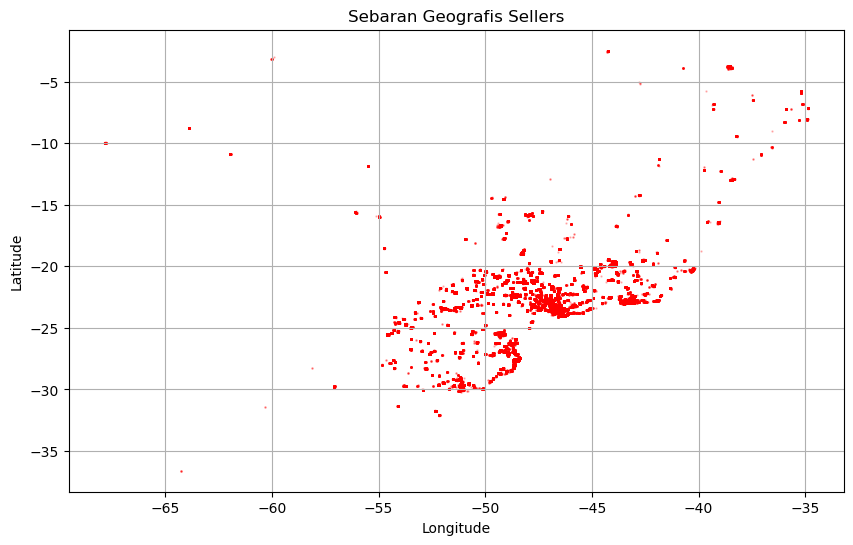

In [145]:
plt.figure(figsize=(10,6))
plt.scatter(geo_sellers_df['geolocation_lng'], geo_sellers_df['geolocation_lat'], s=0.5, alpha=0.25, color = 'Red')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sebaran Geografis Sellers")
plt.grid(True)
plt.show()

mencoba untuk menggabungkan 2 geolocation seller dan customer agar lebih jelas

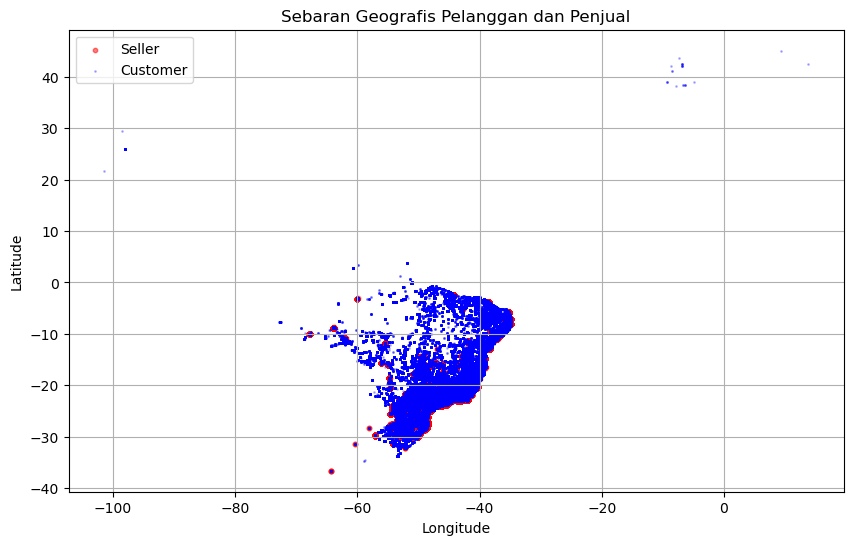

In [147]:
    plt.figure(figsize=(10,6))

    # Scatter plot untuk geo seller
    plt.scatter(geo_sellers_df['geolocation_lng'], geo_sellers_df['geolocation_lat'], s=10, alpha=0.5, label='Seller', color='red')

    # Scatter plot untuk geo customer
    plt.scatter(geo_customers_df['geolocation_lng'], geo_customers_df['geolocation_lat'], s=1, alpha=0.25, label='Customer', color='blue')

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Sebaran Geografis Pelanggan dan Penjual")
    plt.grid(True)
    plt.legend()
    plt.show()

mencoba untuk plot gambar globe untuk mempermudah dalam menganalisa lokasi antara sellers dengan customers

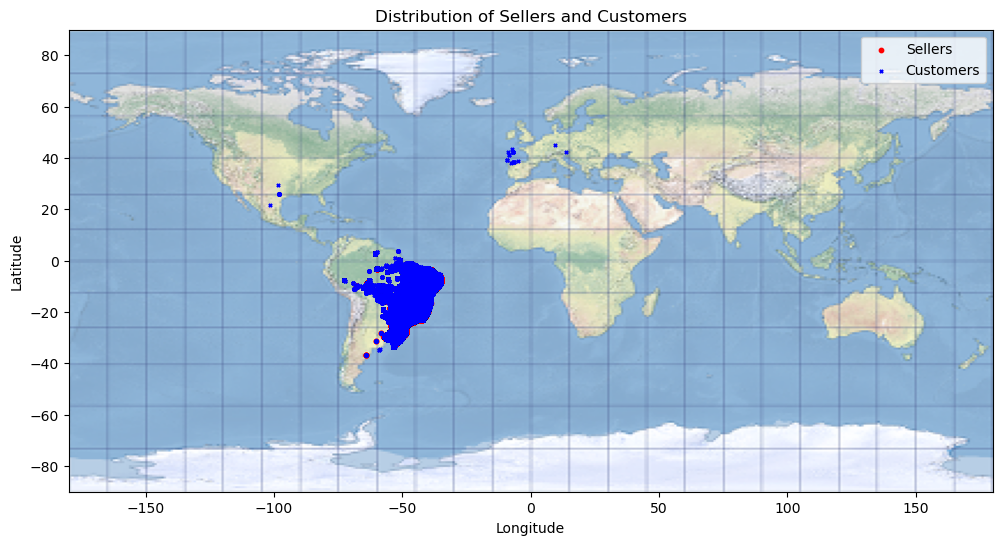

In [149]:
import urllib.request
import matplotlib.image as mpimg

url = "https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/GUID-03C54399-FE45-49A5-975B-3755D6AAA0CD-web.png"

with urllib.request.urlopen(url) as url_response:
    img = mpimg.imread(url_response, format='jpg')

fig, ax = plt.subplots(figsize=(13, 6))

ax.imshow(img, extent=[-180, 180, -90, 90])

ax.scatter(geo_sellers_df['geolocation_lng'], geo_sellers_df['geolocation_lat'],
           s=10, c='red', marker='o', label='Sellers')
ax.scatter(geo_customers_df['geolocation_lng'], geo_customers_df['geolocation_lat'],
           s=5, c='blue', marker='x', label='Customers')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Distribution of Sellers and Customers')
ax.legend()

plt.show()

In [150]:
# geo_sellers_df.to_csv("geo_sellers.csv", index=False)

In [151]:
# geo_customers_df.to_csv("geo_customers.csv", index=False)

### Pertanyaan 2: Produk apa yang paling banyak dan sedikit terjual?

merge data order_items_dataset dengan orders_dataset untuk dapat lebih melihat lebih lengkap mengenai data order

In [154]:
orders_customers_df = pd.merge(
    left=order_items_dataset,
    right=orders_dataset,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,accepted_time,delivery_time,delivery_time_estimated
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,0.0,8.0,16.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,0.0,16.0,19.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0.0,8.0,21.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,0.0,6.0,12.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,0.0,25.0,40.0


In [155]:
name_product_df = pd.merge(
    left=products_dataset,
    right=product_category_name_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
name_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


untuk meilhat data produk yang dibeli oleh customer

In [157]:
product_sell_df = pd.merge(
    left=name_product_df,
    right=orders_customers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_sell_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,accepted_time,delivery_time,delivery_time_estimated
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,0.0,3.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,...,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,0.0,16.0,21.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,...,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,0.0,2.0,8.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,...,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,0.0,3.0,5.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,...,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,0.0,3.0,15.0


In [158]:
nama_product_english = product_sell_df.groupby(by="product_category_name_english").agg({
    "customer_id": ["nunique"],
})

nama_product_english = nama_product_english.sort_values(by=("customer_id", "nunique"), ascending=False)

print(nama_product_english)

                              customer_id
                                  nunique
product_category_name_english            
bed_bath_table                       9417
health_beauty                        8836
sports_leisure                       7720
computers_accessories                6689
furniture_decor                      6449
...                                   ...
arts_and_craftmanship                  23
la_cuisine                             13
cds_dvds_musicals                      12
fashion_childrens_clothes               8
security_and_services                   2

[71 rows x 1 columns]


In [159]:
unique_counts = product_sell_df.groupby('product_category_name_english')['customer_id'].nunique()

total_unique_customers = unique_counts.sum()

print("Total unique customers:", total_unique_customers)

Total unique customers: 97997


Menghitung jumlah customer_id untuk setiap kategori produk dan membuat barplot

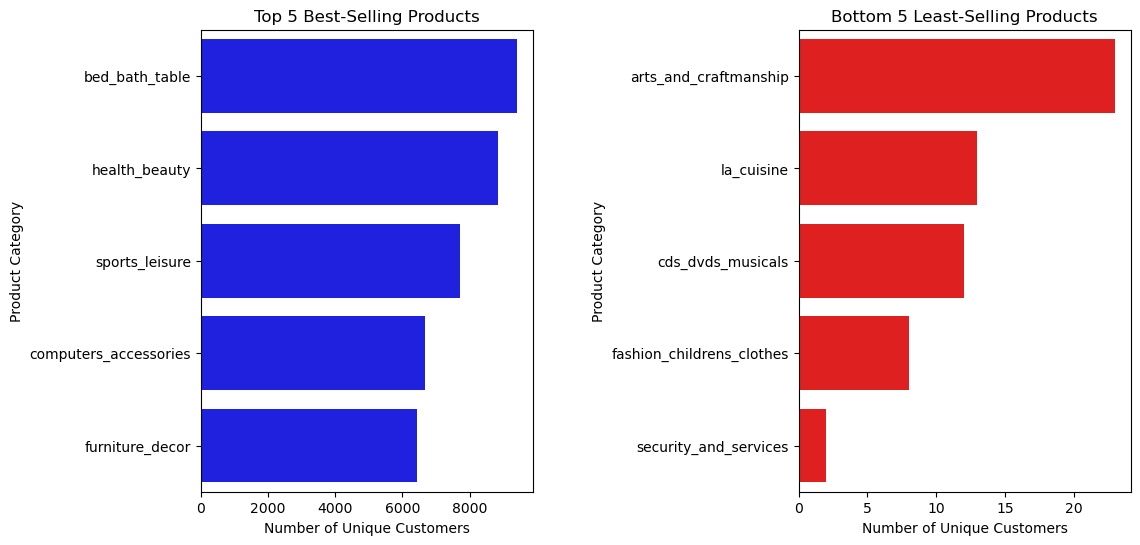

In [161]:
# Group by product category and count unique customers
product_counts = product_sell_df.groupby('product_category_name_english')['customer_id'].nunique().sort_values(ascending=False)

# Select top 5 and bottom 5 products
top_5_products = product_counts.head(5).reset_index()
bottom_5_products = product_counts.tail(5).reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot top 5 products on the left (horizontal bar plot)
sns.barplot(x=top_5_products['customer_id'], y=top_5_products['product_category_name_english'], ax=ax1, color='blue')
ax1.set_xlabel('Number of Unique Customers')
ax1.set_ylabel('Product Category')
ax1.set_title('Top 5 Best-Selling Products')

# Plot bottom 5 products on the right (horizontal bar plot)
sns.barplot(x=bottom_5_products['customer_id'], y=bottom_5_products['product_category_name_english'], ax=ax2, color='red')
ax2.set_xlabel('Number of Unique Customers')
ax2.set_ylabel('Product Category')
ax2.set_title('Bottom 5 Least-Selling Products')

# Adjust the layout with space between the plots
plt.subplots_adjust(wspace=0.8)  # Adjust the space between the subplots

# Display the plot
plt.show()

In [162]:
product_counts = product_sell_df.groupby('product_category_name_english')['customer_id'].nunique().sort_values(ascending=False)
product_counts.head()

product_category_name_english
bed_bath_table           9417
health_beauty            8836
sports_leisure           7720
computers_accessories    6689
furniture_decor          6449
Name: customer_id, dtype: int64

In [163]:
orders_dataset.groupby(by="order_status").customer_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: customer_id, dtype: int64

Menghitung jumlah customer_id untuk setiap order status dan membuat barplot

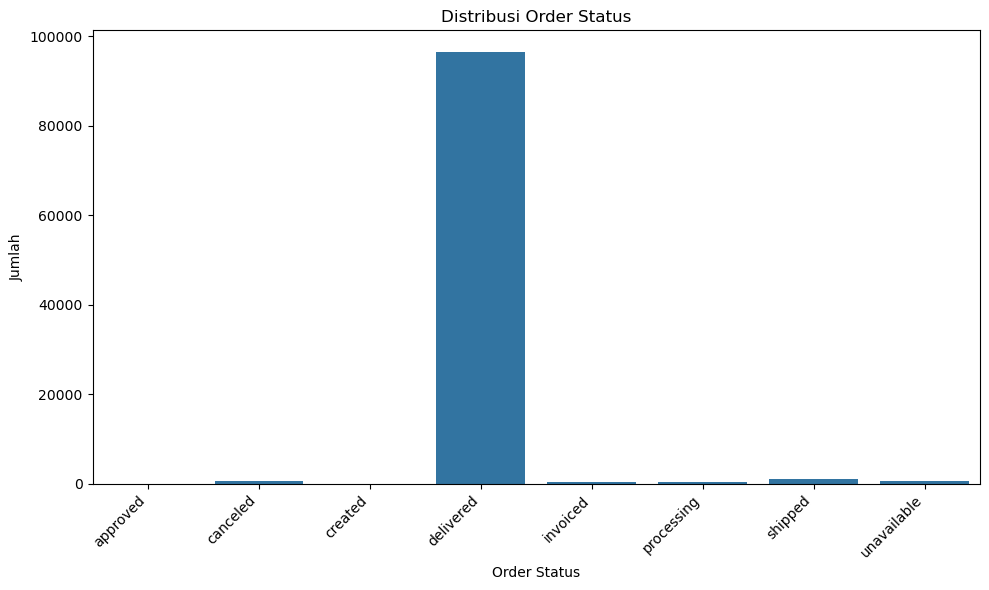

In [165]:
order_status_counts = orders_dataset.groupby(by="order_status").customer_id.count()

plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values)
plt.xlabel('Order Status')
plt.ylabel('Jumlah')
plt.title('Distribusi Order Status')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()

In [166]:
# orders_customers_df.to_csv('orders_customers.csv', index=False)

In [167]:
# name_product_df.to_csv('name_product.csv', index=False)

In [168]:
# product_sell_df.to_csv('product_sell.csv', index=False)

In [169]:
orders_dataset.to_csv('order_dataset.csv', index=False)

### Pertanyaan 3: Apakah penjual menerima pesanan dengan cepat, kemudian mengirimkan tepat waktu?

Waktu pernerimaan pesanan

Mengambil data waktu penerimaan pesanan (accepted_time) dan membuat histogram

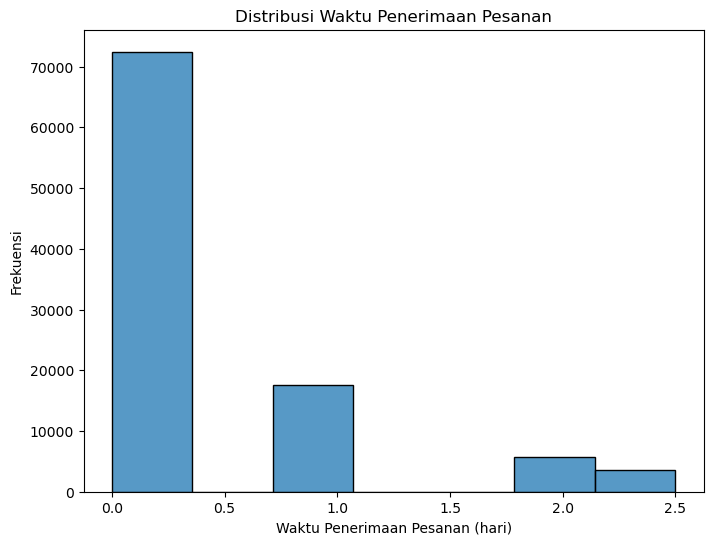

In [173]:
accepted_times = orders_dataset['accepted_time']

plt.figure(figsize=(8, 6))
sns.histplot(accepted_times, bins=7)
plt.xlabel('Waktu Penerimaan Pesanan (hari)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Waktu Penerimaan Pesanan')
plt.show()

Waktu pengiriman pesanan

Mengambil data waktu pengiriman pesanan (delivery_time) dan membuat histogram

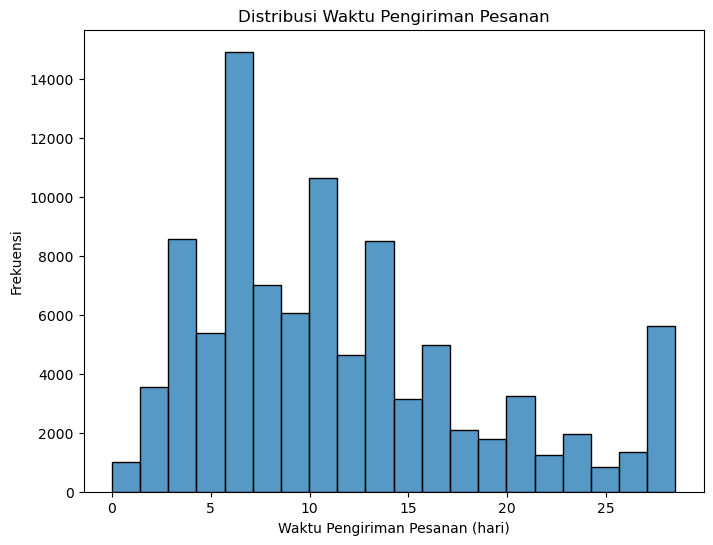

In [176]:
delivery_times = orders_dataset['delivery_time']

plt.figure(figsize=(8, 6))
sns.histplot(delivery_times, bins=20)
plt.xlabel('Waktu Pengiriman Pesanan (hari)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Waktu Pengiriman Pesanan')
plt.show()

In [177]:
# accepted_times.to_csv('accepted_time.csv', index=False)

In [178]:
# delivery_times.to_csv('delivery_time.csv', index=False)

### Pertanyaan 4: Manakah produk yang berkontribusi pemasukan paling besar dan yang paling kecil?

mencari data produk dan order untuk mengetahui penjualan

In [181]:
product_revenue_name_df = pd.merge(
    left=products_dataset[['product_id', 'product_category_name']],
    right=order_items_dataset[['order_id', 'product_id', 'price', 'order_item_id']],
    how="left",
    left_on="product_id",
    right_on="product_id"
)

product_revenue_name_df.head()

,product_id,product_category_name,order_id,price,order_item_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91,1
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,248.00,1
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,79.80,1
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,112.30,1
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,1


untuk mentranslate nama produk dari portuguese (brazil) ke bahasa inggris

In [183]:
product_revenue_df = pd.merge(
    left=product_revenue_name_df,
    right=product_category_name_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

product_revenue_df.head()

,product_id,product_category_name,order_id,price,order_item_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91,1,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,248.00,1,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,79.80,1,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,112.30,1,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,1,housewares


In [184]:
product_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     112650 non-null  object 
 1   product_category_name          112650 non-null  object 
 2   order_id                       112650 non-null  object 
 3   price                          112650 non-null  float64
 4   order_item_id                  112650 non-null  int64  
 5   product_category_name_english  111023 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


In [345]:
product_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     112650 non-null  object 
 1   product_category_name          112650 non-null  object 
 2   order_id                       112650 non-null  object 
 3   price                          112650 non-null  float64
 4   order_item_id                  112650 non-null  int64  
 5   product_category_name_english  111023 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


Hitung total pendapatan untuk setiap produk (menggunakan nama produk dalam bahasa Inggris),
dan kemudian ambil 5 produk dengan pendapatan terbesar,
dan membuat barplot

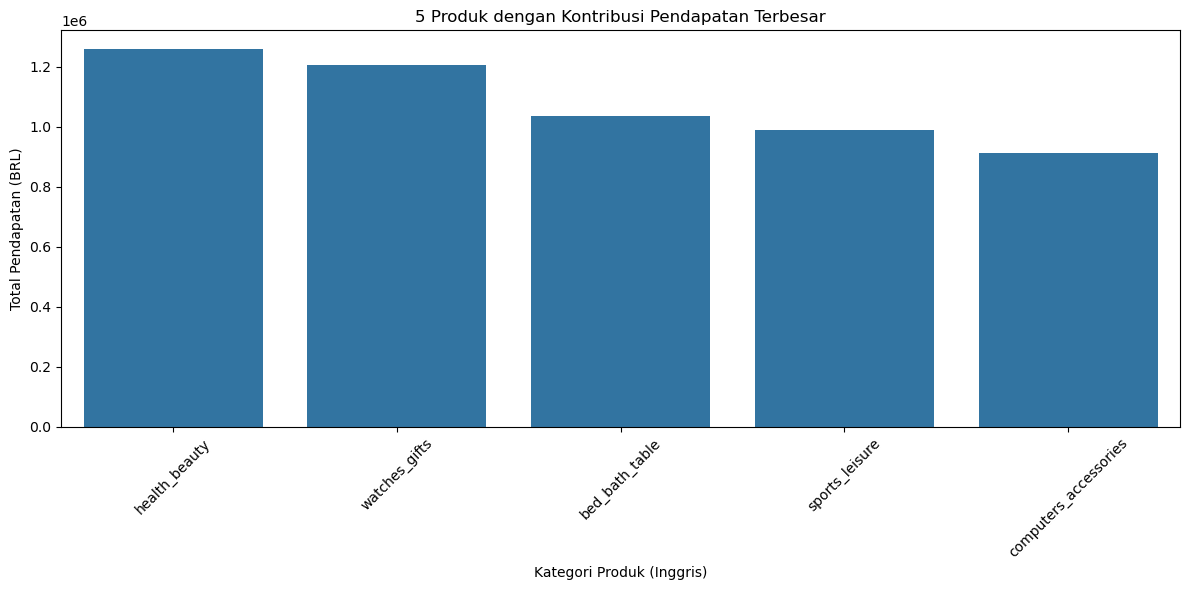

In [343]:
product_revenue = product_revenue_df.groupby('product_category_name_english').agg({'price': 'sum', 'order_item_id': 'count'})
product_revenue = product_revenue.rename(columns={'price': 'total_revenue', 'order_item_id': 'total_sold'})
product_revenue = product_revenue.sort_values(by=['total_revenue'], ascending=False)

top_5_products = product_revenue.head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_products.index, y=top_5_products['total_revenue'])
plt.xticks(rotation=45)
plt.xlabel('Kategori Produk (Inggris)')
plt.ylabel('Total Pendapatan (BRL)')
plt.title('5 Produk dengan Kontribusi Pendapatan Terbesar')
plt.tight_layout()
plt.show()

Ambil 10 produk dengan pendapatan terkecil dan membuat barplot

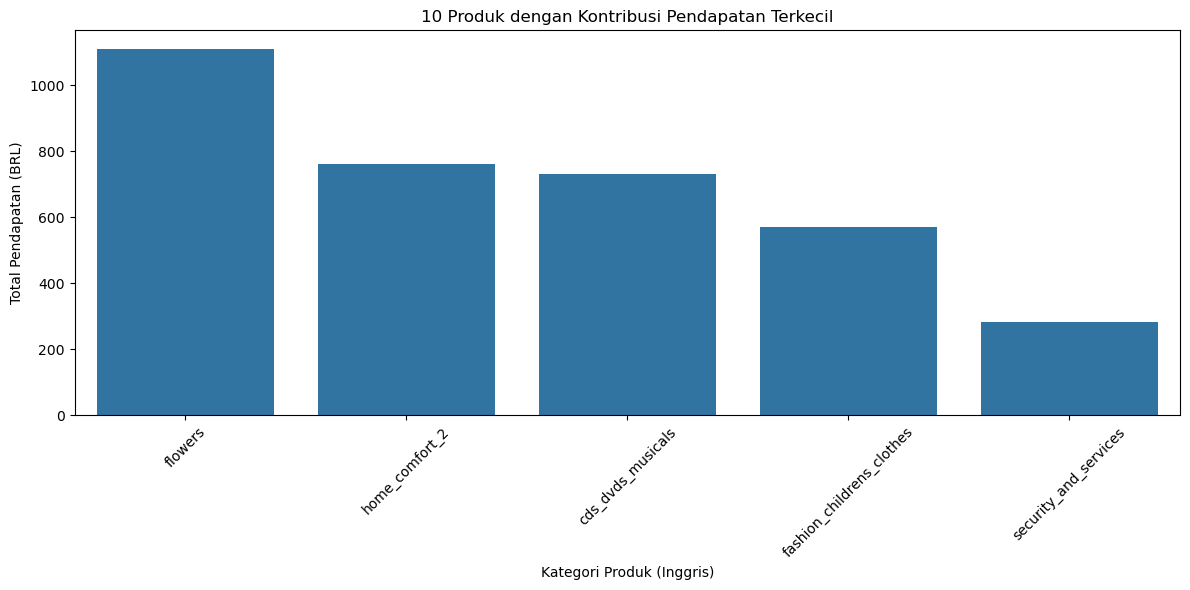

In [341]:
bottom_5_products = product_revenue.tail(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_5_products.index, y=bottom_5_products['total_revenue'])
plt.xticks(rotation=45)
plt.xlabel('Kategori Produk (Inggris)')
plt.ylabel('Total Pendapatan (BRL)')
plt.title('10 Produk dengan Kontribusi Pendapatan Terkecil')
plt.tight_layout()
plt.show()

In [192]:
# product_revenue_name_df.to_csv('product_revenue_name.csv', index=False)

In [193]:
# product_revenue_df.to_csv('product_revenue_df.csv', index=False)

In [194]:
# product_revenue.to_csv('product_revenue.csv', index=False)

### Pertanyaan 5: Metode pembayaran apa yang digunakan pelanggan untuk melakukan transaksi?

Hitung jumlah transaksi untuk setiap metode pembayaran dan membuat barplot

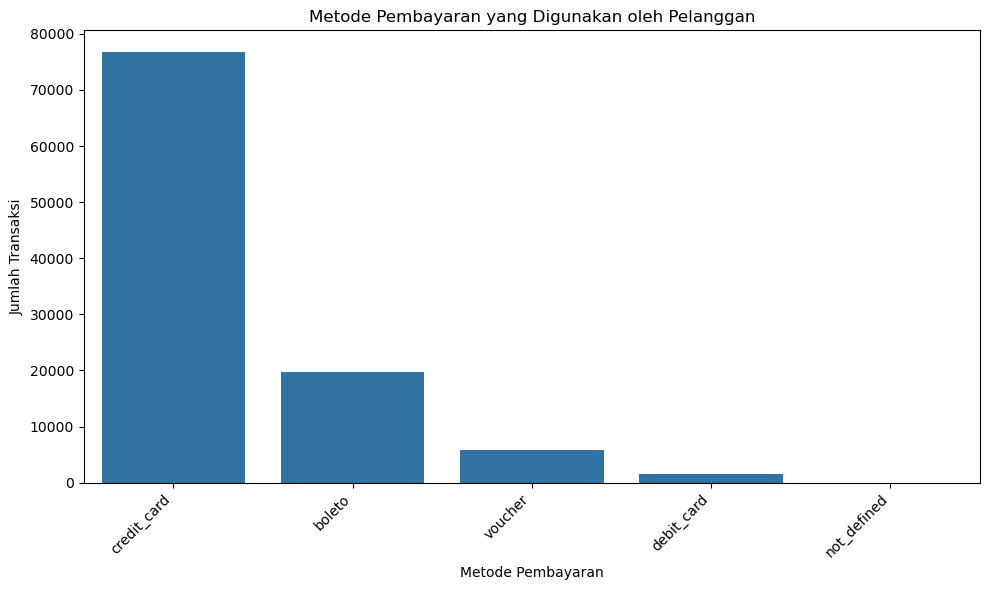

In [304]:
payment_type_counts = order_payments_dataset['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values)
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.title('Metode Pembayaran yang Digunakan oleh Pelanggan')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()

Metode pembayaran yang paling umum digunakan adalah kartu kredit.

**Insight:**
Lima pertanyaan telah dibuat berdasarkan data yang telah dieksplorasi sebelumnya.

## Analisis Lanjutan (Opsional)

## Conclusion

Pertanyaan 1:

Geolokasi pelanggan dan penjual umumnya berdekatan satu sama lain.

Pertanyaan 2:

Kategori produk dengan penjualan tertinggi adalah Tempat Tidur, Mandi & Meja, dengan 9.417 penjualan.
Kategori produk dengan penjualan terendah adalah Keamanan & Layanan, dengan 2 penjualan.

Pertanyaan 3:

Waktu pengiriman umumnya berdekatan dan tidak melebihi waktu estimasi.

Pertanyaan 4:

Pendapatan Tertinggi:

Kesehatan & Kecantikan: R$ 1.258.681,34
Jam Tangan & Hadiah: R$ 1.205.005,68
Tempat Tidur, Mandi & Meja: R$ 1.036.988,68
Olahraga & Rekreasi: R$ 988.048,97
Komputer & Aksesoris: R$ 911.954,32
Perabotan & Dekorasi: R$ 729.762,49
Barang Unik: R$ 635.290,85
Peralatan Rumah Tangga: R$ 632.248,66
Otomotif: R$ 592.720,11
Alat Kebun: R$ 485.256,46
Pendapatan Terendah:

Keamanan & Layanan: R$ 283,29
Fashion & Pakaian Anak: R$ 569,85
CD, DVD & Musik: R$ 730,00
Kenyamanan Rumah: R$ 760,27
Bunga: R$ 1.110,04
Popok & Kebersihan: R$ 1.567,59
Seni & Kerajinan: R$ 1.814,01
La Cuisine: R$ 2.054,99
Fashion & Olahraga: R$ 2.119,51
Fashion & Pakaian Wanita: R$ 2.803,64

Pertanyaan 5:

Kartu Kredit: 76.795 pelanggan
Boleto: 19.784 pelanggan
Voucher: 5.775 pelanggan
Kartu Debit: 1.529 pelanggan
Tidak Terdefinisi: 3 pelanggan